In [2]:
pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import json
import csv
import numpy as np

import os
import time

In [4]:
from rouge import Rouge

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# Setting the base path
base_path =  "/content/gdrive/MyDrive/Muskan_Project"

In [7]:
os.chdir(base_path)

In [8]:
# Reading similarity results of the data generated using ChatGPT - gpt-3.5-turbo model

chat_model1_temp_0_7 = pd.read_csv("Stage2/Results/augmented_data_ChatGPT_model1.csv")
chat_model1_temp_0_7

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,When our spiritual and emotional well-being is...,4,empty void of darkness,trapped in an endless abyss of despair
1,Now i am filled with guilt and stuck feeling l...,I am struggling with a heavy sense of shame an...,4,filled with guilt and stuck feeling like crap,struggling with shame and feeling stuck in neg...
2,And i got home and the voices returned and kep...,"After the retreat, I thought I had overcome my...",4,piece of shit,negative self-talk resurfaced
3,"Before her I survived since shit, sexual assau...","Despite the physical challenges I faced, such ...",1,sexual assaults,persevered and overcame physical challenges
4,I feel like there are only three things that y...,"In terms of physical appearance, I believe tha...",1,"ugly, dumb, and useless",avoid being labeled negatively by being attrac...
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,"Sometimes, I feel like my spirit and emotions ...",4,invisible to everyone,feeling disconnected from others
1460,Its like there is a constant voice in your hea...,Have you ever felt like your spirit and emotio...,4,"worthless, pathetic, useless",feeling constantly attacked by negative though...
1461,You begin to doubt everything about yourself; ...,When you neglect your spiritual and emotional ...,4,worthless,neglecting spiritual and emotional well-being ...
1462,You feel like you are nothing and will be impo...,"Sometimes, you might feel like you are not goo...",4,pathetic,encouragement to work on self-love and finding...


In [9]:
chat1_temp_0_7 = chat_model1_temp_0_7.iloc[:, 0:2]
chat1_temp_0_7

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,When our spiritual and emotional well-being is...
1,Now i am filled with guilt and stuck feeling l...,I am struggling with a heavy sense of shame an...
2,And i got home and the voices returned and kep...,"After the retreat, I thought I had overcome my..."
3,"Before her I survived since shit, sexual assau...","Despite the physical challenges I faced, such ..."
4,I feel like there are only three things that y...,"In terms of physical appearance, I believe tha..."
...,...,...
1459,I have this constant feeling that I am invisib...,"Sometimes, I feel like my spirit and emotions ..."
1460,Its like there is a constant voice in your hea...,Have you ever felt like your spirit and emotio...
1461,You begin to doubt everything about yourself; ...,When you neglect your spiritual and emotional ...
1462,You feel like you are nothing and will be impo...,"Sometimes, you might feel like you are not goo..."


In [10]:
chat_model1_temp_0_5 = pd.read_csv("Stage2/Results/augmented_data_ChatGPT_model1_v3.csv")
chat_model1_temp_0_5

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,The spiritual and emotional aspect of life can...,4,empty void of darkness,spiritual and emotional aspect of life can be ...
1,Now i am filled with guilt and stuck feeling l...,My spiritual and emotional state is in turmoil...,4,filled with guilt and stuck feeling like crap,"spiritual and emotional turmoil, heavy burden ..."
2,And i got home and the voices returned and kep...,"After a long day, I found myself alone with my...",4,piece of shit,negative self-talk and feeling worthless due t...
3,"Before her I survived since shit, sexual assau...",Despite the challenges I faced in terms of my ...,1,sexual assaults,persevered through difficult times
4,I feel like there are only three things that y...,"In terms of physical appearance, it seems like...",1,"ugly, dumb, and useless",unacceptable physical characteristics
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,"Sometimes, I feel like my soul is invisible to...",4,invisible to everyone,soul is invisible to the world
1460,Its like there is a constant voice in your hea...,Have you ever felt like your emotions are cons...,4,"worthless, pathetic, useless",constant battle to find inner peace and emotio...
1461,You begin to doubt everything about yourself; ...,As you struggle with your spiritual and emotio...,4,worthless,struggle with spiritual and emotional well-bei...
1462,You feel like you are nothing and will be impo...,"Sometimes, you may feel like you are not enoug...",4,pathetic,encouragement to remember self-worth and seek ...


In [11]:
chat1_temp_0_5 = chat_model1_temp_0_5.iloc[:, 0:2]
chat1_temp_0_5

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,The spiritual and emotional aspect of life can...
1,Now i am filled with guilt and stuck feeling l...,My spiritual and emotional state is in turmoil...
2,And i got home and the voices returned and kep...,"After a long day, I found myself alone with my..."
3,"Before her I survived since shit, sexual assau...",Despite the challenges I faced in terms of my ...
4,I feel like there are only three things that y...,"In terms of physical appearance, it seems like..."
...,...,...
1459,I have this constant feeling that I am invisib...,"Sometimes, I feel like my soul is invisible to..."
1460,Its like there is a constant voice in your hea...,Have you ever felt like your emotions are cons...
1461,You begin to doubt everything about yourself; ...,As you struggle with your spiritual and emotio...
1462,You feel like you are nothing and will be impo...,"Sometimes, you may feel like you are not enoug..."


In [12]:
chat_model1_temp_1_0 = pd.read_csv("Stage2/Results/augmented_data_ChatGPT_model1_v2.csv")
chat_model1_temp_1_0

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,The spiritual and emotional aspect of our live...,4,empty void of darkness,importance of seeking support and healing afte...
1,Now i am filled with guilt and stuck feeling l...,I feel deeply conflicted and burdened by my sp...,4,filled with guilt and stuck feeling like crap,overwhelming sense of sadness and despair
2,And i got home and the voices returned and kep...,"After experiencing a heart-wrenching breakup, ...",4,piece of shit,negative voices telling me I was unworthy and ...
3,"Before her I survived since shit, sexual assau...",Despite facing physical challenges and tragedi...,1,sexual assaults,overcame physical challenges and tragedies
4,I feel like there are only three things that y...,Your physical appearance is something that can...,1,"ugly, dumb, and useless",importance of taking care of physical and ment...
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,The more I delve into my spiritual and emotion...,4,invisible to everyone,disconnected from the world around me
1460,Its like there is a constant voice in your hea...,"Sometimes, it feels like you are carrying the ...",4,"worthless, pathetic, useless",feeling overwhelmed and constantly failing
1461,You begin to doubt everything about yourself; ...,Feeling lost and disconnected from your inner ...,4,worthless,"feeling lost and disconnected, negative self-t..."
1462,You feel like you are nothing and will be impo...,"Sometimes, you may feel lost and disconnected ...",4,pathetic,encouragement to embrace self-worth and positi...


In [13]:
chat1_temp_1_0 = chat_model1_temp_1_0.iloc[:, 0:2]
chat1_temp_1_0

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,The spiritual and emotional aspect of our live...
1,Now i am filled with guilt and stuck feeling l...,I feel deeply conflicted and burdened by my sp...
2,And i got home and the voices returned and kep...,"After experiencing a heart-wrenching breakup, ..."
3,"Before her I survived since shit, sexual assau...",Despite facing physical challenges and tragedi...
4,I feel like there are only three things that y...,Your physical appearance is something that can...
...,...,...
1459,I have this constant feeling that I am invisib...,The more I delve into my spiritual and emotion...
1460,Its like there is a constant voice in your hea...,"Sometimes, it feels like you are carrying the ..."
1461,You begin to doubt everything about yourself; ...,Feeling lost and disconnected from your inner ...
1462,You feel like you are nothing and will be impo...,"Sometimes, you may feel lost and disconnected ..."


In [14]:
# # Reading similarity results of the data generated using ChatGPT - gpt-3.5-turbo-0301 model

chat_model2 = pd.read_csv("Stage2/Results/augmented_data_ChatGPT_model2.csv")
chat_model2

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,The spiritual and emotional impact of certain ...,4,empty void of darkness,feeling trapped in a never-ending abyss of emp...
1,Now i am filled with guilt and stuck feeling l...,I am struggling with a heavy sense of remorse ...,4,filled with guilt and stuck feeling like crap,struggling with remorse and feeling emotionall...
2,And i got home and the voices returned and kep...,"After the accident, I found myself struggling ...",4,piece of shit,struggling with spiritual and emotional well-b...
3,"Before her I survived since shit, sexual assau...",Despite the challenges I faced in my physical ...,1,sexual assaults,persevered through physical challenges
4,I feel like there are only three things that y...,"In terms of physical appearance, it seems that...",1,"ugly, dumb, and useless",undesirable traits in physical appearance
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,Sometimes I feel like my emotions and spiritua...,4,invisible to everyone,emotions and spiritual self not understood by ...
1460,Its like there is a constant voice in your hea...,"Sometimes, it feels like there is a heavy weig...",4,"worthless, pathetic, useless",feeling consumed by negative emotions and trap...
1461,You begin to doubt everything about yourself; ...,Your soul feels heavy with the weight of doubt...,4,worthless,doubt and insecurity causing negative self-tal...
1462,You feel like you are nothing and will be impo...,"Sometimes, you might feel lost and insignifica...",4,pathetic,"feeling lost and insignificant, fear of being ..."


In [15]:
chat2 = chat_model2.iloc[:, 0:2]
chat2

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,The spiritual and emotional impact of certain ...
1,Now i am filled with guilt and stuck feeling l...,I am struggling with a heavy sense of remorse ...
2,And i got home and the voices returned and kep...,"After the accident, I found myself struggling ..."
3,"Before her I survived since shit, sexual assau...",Despite the challenges I faced in my physical ...
4,I feel like there are only three things that y...,"In terms of physical appearance, it seems that..."
...,...,...
1459,I have this constant feeling that I am invisib...,Sometimes I feel like my emotions and spiritua...
1460,Its like there is a constant voice in your hea...,"Sometimes, it feels like there is a heavy weig..."
1461,You begin to doubt everything about yourself; ...,Your soul feels heavy with the weight of doubt...
1462,You feel like you are nothing and will be impo...,"Sometimes, you might feel lost and insignifica..."


In [16]:
# Reading similarity results of the data generated using GPT3 - text-curie-001 model

gpt3_model1 = pd.read_csv("Stage2/Results/augmented_data_GPT3_model1.csv")
gpt3_model1

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,Once you experience a spiritual or emotional a...,4,empty void of darkness,hard to go back to the way things were
1,Now i am filled with guilt and stuck feeling l...,Now I feel burdened by guilt and feel like crap.,4,filled with guilt and stuck feeling like crap,burdened by guilt and feel like crap
2,And i got home and the voices returned and kep...,"And I got home and the voices returned, tellin...",4,piece of shit,worthless
3,"Before her I survived since shit, sexual assau...",I've been through so much before you. I've bee...,1,sexual assaults,sexual assaults
4,I feel like there are only three things that y...,There are only a few things that you cannot be...,1,"ugly, dumb, and useless",ugly
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,I feel like I'm an outcast and no one sees me the,4,invisible to everyone,feel like an outcast
1460,Its like there is a constant voice in your hea...,It feels like there's a voice in my head const...,4,"worthless, pathetic, useless",voice in head constantly telling me
1461,You begin to doubt everything about yourself; ...,You begin to doubt yourself; telling yourself ...,4,worthless,telling yourself whatever you do isn't good en...
1462,You feel like you are nothing and will be impo...,You feel like you are nothing and will be insi...,4,pathetic,insignificant


In [17]:
gpt3_1= gpt3_model1.iloc[:, 0:2]
gpt3_1

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,Once you experience a spiritual or emotional a...
1,Now i am filled with guilt and stuck feeling l...,Now I feel burdened by guilt and feel like crap.
2,And i got home and the voices returned and kep...,"And I got home and the voices returned, tellin..."
3,"Before her I survived since shit, sexual assau...",I've been through so much before you. I've bee...
4,I feel like there are only three things that y...,There are only a few things that you cannot be...
...,...,...
1459,I have this constant feeling that I am invisib...,I feel like I'm an outcast and no one sees me the
1460,Its like there is a constant voice in your hea...,It feels like there's a voice in my head const...
1461,You begin to doubt everything about yourself; ...,You begin to doubt yourself; telling yourself ...
1462,You feel like you are nothing and will be impo...,You feel like you are nothing and will be insi...


In [18]:
# # Reading similarity results of the data generated using GPT3 - text-davinci-003 model

gpt3_model2 = pd.read_csv("Stage2/Results/augmented_data_GPT3_model2.csv")
gpt3_model2

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,"The darkness of the void can be overwhelming, ...",4,empty void of darkness,spiritual and emotional journey
1,Now i am filled with guilt and stuck feeling l...,"I feel so ashamed and worthless right now, lik...",4,filled with guilt and stuck feeling like crap,feel ashamed and worthless
2,And i got home and the voices returned and kep...,"The voices kept echoing in my head, telling me...",4,piece of shit,"unworthy, undeserving"
3,"Before her I survived since shit, sexual assau...","Before her, I had endured physical abuse, hara...",1,sexual assaults,endured physical abuse
4,I feel like there are only three things that y...,It seems like there's nothing worse than feeli...,1,"ugly, dumb, and useless",no purpose or value
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,I often feel like I'm being overlooked and tha...,4,invisible to everyone,"overlooked, no one notices presence."
1460,Its like there is a constant voice in your hea...,The negative thoughts keep coming in like a wa...,4,"worthless, pathetic, useless",inadequate
1461,You begin to doubt everything about yourself; ...,You start to question your purpose in life and...,4,worthless,question purpose in life
1462,You feel like you are nothing and will be impo...,You feel like you're a burden and that it woul...,4,pathetic,feel like a burden


In [19]:
gpt3_2 = gpt3_model2.iloc[:, 0:2]
gpt3_2

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,"The darkness of the void can be overwhelming, ..."
1,Now i am filled with guilt and stuck feeling l...,"I feel so ashamed and worthless right now, lik..."
2,And i got home and the voices returned and kep...,"The voices kept echoing in my head, telling me..."
3,"Before her I survived since shit, sexual assau...","Before her, I had endured physical abuse, hara..."
4,I feel like there are only three things that y...,It seems like there's nothing worse than feeli...
...,...,...
1459,I have this constant feeling that I am invisib...,I often feel like I'm being overlooked and tha...
1460,Its like there is a constant voice in your hea...,The negative thoughts keep coming in like a wa...
1461,You begin to doubt everything about yourself; ...,You start to question your purpose in life and...
1462,You feel like you are nothing and will be impo...,You feel like you're a burden and that it woul...


In [20]:
eda = pd.read_csv("Stage2/New_Augment_Techniques/EDA/EDA_augmented_data.csv")
eda

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,once it chance there is no lead back up and yo...,4,empty void of darkness,empty of darkness
1,Now i am filled with guilt and stuck feeling l...,now i am filled with guilt and stuck feeling l...,4,filled with guilt and stuck feeling like crap,fill up with guilt trip and lodge flavour corr...
2,And i got home and the voices returned and kep...,and i home and the returned and kept telling m...,4,piece of shit,bit piece of shit
3,"Before her I survived since shit, sexual assau...",before her i survived since ahead shit similar...,1,sexual assaults,sexual violation
4,I feel like there are only three things that y...,i feel like dead there are only three similar ...,1,"ugly, dumb, and useless",ugly dumb useless and
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,i have this incessant opinion that i am unseea...,4,invisible to everyone,to everyone
1460,Its like there is a constant voice in your hea...,its corresponding there is a unremitting vocal...,4,"worthless, pathetic, useless",worthless pathetic useless
1461,You begin to doubt everything about yourself; ...,you set out to dubiousness everything about yo...,4,worthless,worthless
1462,You feel like you are nothing and will be impo...,you feel like you are and will be important an...,4,pathetic,pathetic


In [21]:
edadata = eda.iloc[:, 0:2]
edadata

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,once it chance there is no lead back up and yo...
1,Now i am filled with guilt and stuck feeling l...,now i am filled with guilt and stuck feeling l...
2,And i got home and the voices returned and kep...,and i home and the returned and kept telling m...
3,"Before her I survived since shit, sexual assau...",before her i survived since ahead shit similar...
4,I feel like there are only three things that y...,i feel like dead there are only three similar ...
...,...,...
1459,I have this constant feeling that I am invisib...,i have this incessant opinion that i am unseea...
1460,Its like there is a constant voice in your hea...,its corresponding there is a unremitting vocal...
1461,You begin to doubt everything about yourself; ...,you set out to dubiousness everything about yo...
1462,You feel like you are nothing and will be impo...,you feel like you are and will be important an...


In [22]:
bt = pd.read_csv("Stage2/New_Augment_Techniques/Backtranslation/BT_augmented_data.csv")
bt

,Original_text,Augmented_Text,Aspect,Original_Explanation,Augmented_Explanation
0,Once it happens there is no going back and you...,Once there is no turning back and you are stuc...,4,empty void of darkness,♪ Empty from the darkness ♪
1,Now i am filled with guilt and stuck feeling l...,Now I'm full of guilt and stuck feeling like s...,4,filled with guilt and stuck feeling like crap,It's full of guilt and shit.
2,And i got home and the voices returned and kep...,And I came home and the voices came back and t...,4,piece of shit,- It's shit.
3,"Before her I survived since shit, sexual assau...","Before her, I've survived from shit, sexual as...",1,sexual assaults,Sexual abuse
4,I feel like there are only three things that y...,♪ I feel like there's only three things that y...,1,"ugly, dumb, and useless","Laid, stupid and useless"
...,...,...,...,...,...
1459,I have this constant feeling that I am invisib...,I have this constant feeling that I'm invisibl...,4,invisible to everyone,Invisible for everyone
1460,Its like there is a constant voice in your hea...,It's like there's a constant voice in your hea...,4,"worthless, pathetic, useless","Without value, pathetic, useless"
1461,You begin to doubt everything about yourself; ...,You start to doubt everything about yourself; ...,4,worthless,- It's worthless.
1462,You feel like you are nothing and will be impo...,You feel like you're nothing and will be impor...,4,pathetic,.................................................


In [23]:
btdata = bt.iloc[:, 0:2]
btdata

,Original_text,Augmented_Text
0,Once it happens there is no going back and you...,Once there is no turning back and you are stuc...
1,Now i am filled with guilt and stuck feeling l...,Now I'm full of guilt and stuck feeling like s...
2,And i got home and the voices returned and kep...,And I came home and the voices came back and t...
3,"Before her I survived since shit, sexual assau...","Before her, I've survived from shit, sexual as..."
4,I feel like there are only three things that y...,♪ I feel like there's only three things that y...
...,...,...
1459,I have this constant feeling that I am invisib...,I have this constant feeling that I'm invisibl...
1460,Its like there is a constant voice in your hea...,It's like there's a constant voice in your hea...
1461,You begin to doubt everything about yourself; ...,You start to doubt everything about yourself; ...
1462,You feel like you are nothing and will be impo...,You feel like you're nothing and will be impor...


# ROUGE Score

In [24]:
def calculate_rouge_scores(original, augmented):
    rouge = Rouge()
    scores = rouge.get_scores(augmented, original)
    rouge_1_score = scores[0]['rouge-1']['f']
    rouge_2_score = scores[0]['rouge-2']['f']
    rouge_l_score = scores[0]['rouge-l']['f']
    
    return rouge_1_score, rouge_2_score, rouge_l_score


In [25]:
# Function to find token lengths using tictoken tokenizer
def find_rough_scores(df):

  rouge1=[]
  rouge2=[]
  rougel=[]
  i=0

  for index, row in df.iterrows():

      original_text = row['Original_text']
      augmented_text = row['Augmented_Text']
      
      r1, r2, rl = calculate_rouge_scores(original_text, augmented_text)

      i+=1
      rouge1.append(r1)
      rouge2.append(r2)
      rougel.append(rl)

  mean_r1 = np.mean(rouge1)
  mean_r2 = np.mean(rouge2)
  mean_rl = np.mean(rougel)


    # Print the results
  print("Average ROUGE-1: {:.2f}".format(mean_r1))
  print("Average ROUGE-2: {:.2f}".format(mean_r2))
  print("Average ROUGE-L: {:.2f}".format(mean_rl))

  return mean_r1, mean_r2, mean_rl

In [26]:
R1 = []
R2 = []
RL = []

In [27]:
# gpt-3.5-turbo dataset with temp=0.7
r1, r2, rl = find_rough_scores(chat1_temp_0_7)

R1.append(r1)
R2.append(r2)
RL.append(rl)

Average ROUGE-1: 0.19
Average ROUGE-2: 0.03
Average ROUGE-L: 0.17


In [28]:
# gpt-3.5-turbo-0301 dataset with temp=0.7
r1, r2, rl = find_rough_scores(chat2)

R1.append(r1)
R2.append(r2)
RL.append(rl)

Average ROUGE-1: 0.19
Average ROUGE-2: 0.03
Average ROUGE-L: 0.17


In [29]:
# text-curie-001 dataset with temp=0.7
r1, r2, rl = find_rough_scores(gpt3_1)

R1.append(r1)
R2.append(r2)
RL.append(rl)

Average ROUGE-1: 0.48
Average ROUGE-2: 0.32
Average ROUGE-L: 0.47


In [30]:
# text-davinci-003 dataset with temp=0.7
r1, r2, rl = find_rough_scores(gpt3_2)

R1.append(r1)
R2.append(r2)
RL.append(rl)

Average ROUGE-1: 0.23
Average ROUGE-2: 0.06
Average ROUGE-L: 0.21


In [31]:
r1, r2, rl = find_rough_scores(edadata)

R1.append(r1)
R2.append(r2)
RL.append(rl)

Average ROUGE-1: 0.65
Average ROUGE-2: 0.32
Average ROUGE-L: 0.59


In [32]:
r1, r2, rl = find_rough_scores(btdata)

R1.append(r1)
R2.append(r2)
RL.append(rl)

Average ROUGE-1: 0.73
Average ROUGE-2: 0.54
Average ROUGE-L: 0.72


In [33]:
R1

[0.19281290195056447,
 0.1930918899790856,
 0.4836895257108927,
 0.23451554267710478,
 0.6518888342690188,
 0.7326446647761423]

In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# Plotting ROUGE scores

def plot_rouge(s1, s2, s3):

    x = ['gpt-3.5-turbo', 'gpt-3.5-turbo-0301', 'text-curie-001', 'text-davinci-003', 'EDA', 'BT']

    # Set the width of each bar and the x coordinates of the left side of each bar
    bar_width = 0.2
    x_pos = np.arange(len(x))

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Create the bar charts for each score
    ax.bar(x_pos - bar_width, s1, bar_width, label='ROUGE-1',  color='blue', alpha=0.7)
    ax.bar(x_pos, s2, bar_width, label='ROUGE-2', color='yellow', alpha=0.7)
    ax.bar(x_pos + bar_width, s3, bar_width, label='ROUGE-L', color='purple', alpha=0.7)

    # Set the axis labels and title
    ax.set_xlabel('Models',fontsize=12)
    ax.set_ylabel('ROUGE scores', fontsize=12)
    ax.set_title('Scores for augmented datasets', fontsize=12)

    # Set the x axis tick labels
    ax.set_xticks(x_pos, )
    ax.set_xticklabels(x, fontsize=12)

    # Rotate the x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=20, ha='right')

    ax.tick_params(axis='y', labelsize=10)

    # Add the legend
    ax.legend()

    # Show the plot
    plt.savefig('Stage2/Results/S1_ROUGE.pdf', bbox_inches="tight", pad_inches=0.1)
    plt.show()

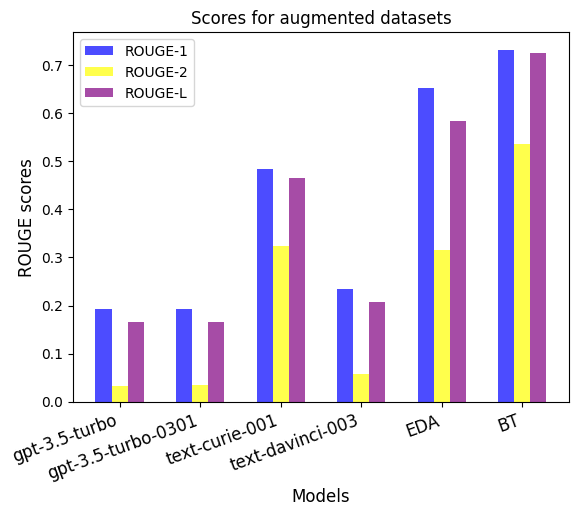

In [48]:
plot_rouge(R1, R2, RL)

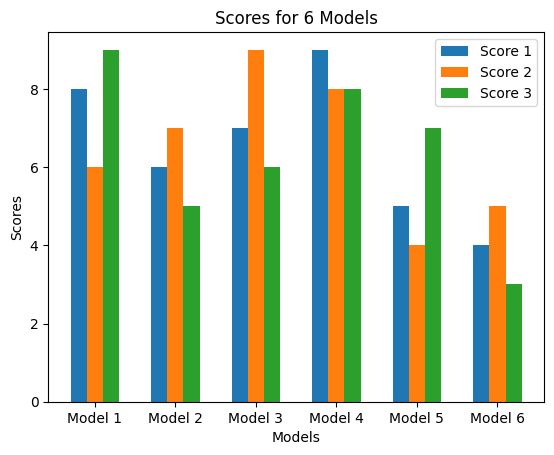

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the chart
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6']
score_1 = [8, 6, 7, 9, 5, 4]
score_2 = [6, 7, 9, 8, 4, 5]
score_3 = [9, 5, 6, 8, 7, 3]

# Set the width of each bar and the x coordinates of the left side of each bar
bar_width = 0.2
x_pos = np.arange(len(models))

# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the bar charts for each score
ax.bar(x_pos - bar_width, score_1, bar_width, label='Score 1')
ax.bar(x_pos, score_2, bar_width, label='Score 2')
ax.bar(x_pos + bar_width, score_3, bar_width, label='Score 3')

# Set the axis labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Scores for 6 Models')

# Set the x axis tick labels
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

# Add the legend
ax.legend()

# Show the plot
plt.show()


# BLEU Score

In [38]:
def calculate_bleu_scores(original, augmented):
    original = [original.split()]
    augmented = augmented.split()
    
    # bleu_1_score = sentence_bleu(original, augmented, weights=(1, 0, 0, 0))
    # bleu_2_score = sentence_bleu(original, augmented, weights=(0.5, 0.5, 0, 0))

        # Set the weights for n-gram precisions
    weights = (0.5, 0.5)  # Example: equal weight for BLEU-1 and BLEU-2

    # Set the brevity penalty parameters
    brevity_penalty = True
    brevity_penalty_factor = 0.1  # Example: penalty factor for brevity penalty

    # Calculate BLEU scores with smoothing and brevity penalty
    smoothie = SmoothingFunction().method1
    bleu_score = sentence_bleu(reference, hypothesis, weights=weights, smoothing_function=smoothie,
                               brevity_penalty=brevity_penalty, brevity_penalty_factor=brevity_penalty_factor)
    

    return bleu_1_score, bleu_2_score


    bleu_score = sentence_bleu(reference, hypothesis, weights=weights, smoothing_function=smoothie,
                               brevity_penalty=brevity_penalty, brevity_penalty_factor=brevity_penalty_factor)

In [39]:
# Function to find token lengths using tictoken tokenizer
def find_bleu_scores(df):

  bleu1=[]
  bleu2=[]

  i=0

  for index, row in df.iterrows():

      original_text = row['Original_text']
      augmented_text = row['Augmented_Text']
      
      b1, b2 = calculate_bleu_scores(original_text, augmented_text)

      i+=1
      bleu1.append(b1)
      bleu2.append(b2)

  mean_b1 = np.mean(bleu1)
  mean_b2 = np.mean(bleu2)



    # Print the results
  print("Average BLEU-1: {:.2f}".format(mean_b1))
  print("Average BLEU-2: {:.2f}".format(mean_b2))

In [40]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from nltk.translate.bleu_score import sentence_bleu

In [42]:
fontsize=12# gpt-3.5-turbo dataset with temp=0.7
find_bleu_scores(chat1_temp_0_7)

NameError: ignored

In [ ]:
# gpt-3.5-turbo-0301 dataset with temp=0.7
find_bleu_scores(chat2)

In [ ]:
# text-curie-001 dataset with temp=0.7
find_bleu_scores(gpt3_1)

In [ ]:
# text-davinci-003 dataset with temp=0.7
find_bleu_scores(gpt3_2)

In [ ]:
find_bleu_scores(edadata)

In [ ]:
find_bleu_scores(btdata)